# Creating a CNN for Persian Character Recognition

## Importing necessary libraries

In [8]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Creating the data generator

In [9]:
TRAINING_DIR = 'path\to\ocr_train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=10,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = 'path\to\ocr_valid'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(32,32),
    class_mode='categorical',
    batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(32,32),
    class_mode='categorical',
    batch_size=128
)

Found 58678 images belonging to 28 classes.
Found 16768 images belonging to 28 classes.


## Creating a simple 2-layer CNN as the backbone of OCR

In [11]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 32 neuron hidden layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])

# Print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                18464     
_________________________________________________________________
dense_5 (Dense)              (None, 28)                924       
Total para

In [14]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

Epoch 1/10
459/459 [==============================] - 1153s 3s/step - loss: 0.8708 - acc: 0.7646 - val_loss: 0.3594 - val_acc: 0.9185
Epoch 2/10
459/459 [==============================] - 95s 207ms/step - loss: 0.2145 - acc: 0.9406 - val_loss: 0.2861 - val_acc: 0.9391
Epoch 3/10
459/459 [==============================] - 97s 211ms/step - loss: 0.1526 - acc: 0.9595 - val_loss: 0.2439 - val_acc: 0.9515
Epoch 4/10
459/459 [==============================] - 93s 202ms/step - loss: 0.1247 - acc: 0.9664 - val_loss: 0.2158 - val_acc: 0.9550
Epoch 5/10
459/459 [==============================] - 95s 207ms/step - loss: 0.1059 - acc: 0.9719 - val_loss: 0.1894 - val_acc: 0.9603
Epoch 6/10
459/459 [==============================] - 95s 208ms/step - loss: 0.0904 - acc: 0.9770 - val_loss: 0.1708 - val_acc: 0.9620
Epoch 7/10
459/459 [==============================] - 97s 212ms/step - loss: 0.0829 - acc: 0.9782 - val_loss: 0.1614 - val_acc: 0.9645
Epoch 8/10
459/459 [==============================] - 99

## Plotting accuracy curve

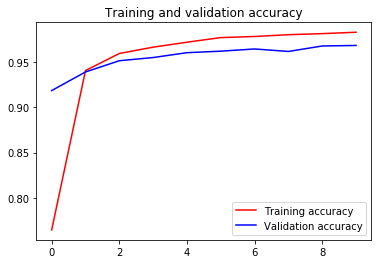

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Saving the model (architecture, weights) to use later

In [18]:
from tensorflow.keras.models import load_model

# Save the model to disk
model.save('path\to\CNN_OCR.h5')
